## Sales Forecasting

### 1) Problem Statement
* This Project Main Aims to Understand how the impact of holidays, economic indicators, and environmental factors on weekly sales And
Identify trends and seasonal patterns in sales data

## 2) Data Collection
* Data source :-https://www.kaggle.com/datasets/yasserh/walmart-dataset

### Import Data and Requires libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('Walmart.csv')

### Show Top 5 results

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"16,43,691",0,42,2.6,211.10,8.11
1,1,12-02-2010,"16,41,957",1,39,2.5,211.24,8.11
2,1,19-02-2010,"16,11,968",0,40,2.5,211.29,8.11
3,1,26-02-2010,"14,09,728",0,47,2.6,211.32,8.11
4,1,05-03-2010,"15,54,807",0,47,2.6,211.35,8.11


### Shape of Dataset

In [4]:
df.shape

(6435, 8)

### Checking Missing Value

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### There is no missing value in Dataset

In [6]:
df.duplicated().sum()

0

#### There is no duplicate value in dataset

### Dataset information

* store : A unique 45 store identifier for each Walmart store.
* Date : the week during which the sale were recorded.
* Weekly_Sale: total sale for a given store in specific week.[this is the target variable for Predication].
* Holiday_Flag: Indicated 1-> Holiday Week 0 -> Non-Holiday Week
* Temperature: Its the temperature on the day of sale.
* Fuel_price: Average Fuel price in the region during the week.
* CPI (customer price Index): measure the prevailing consumer price level and infilation.
* Unemployment: the unemployment rate at the region at the time of sale.
#### Holiday event included: Super bowl ,Labour day ,Thanksgiving ,Christmas
* Holiday Events\ Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Check datatpyes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   int64  
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB


#### converting Date into datetime datatype

In [8]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [9]:
df['Temperature_C'] = (df['Temperature'] - 32) * 5/9

In [10]:
df.drop(columns=['Temperature'], inplace=True)


In [11]:
df['Weekly_Sales'].dtype

dtype('O')

In [12]:
df['Weekly_Sales'] = (df['Weekly_Sales'].astype(str).str.replace(',', '', regex=True).str.replace('₹', '', regex=True))
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'])
df['Weekly_Sales'].dtype


dtype('int64')

### Checking number of unique value of each columns

In [13]:
df.nunique()

Store              45
Date              143
Weekly_Sales     6427
Holiday_Flag        2
Fuel_Price         21
CPI              1602
Unemployment      267
Temperature_C      94
dtype: int64

### Add additional column month and year from the "Date" column

In [14]:
df['Year']=df['Date'].dt.year
df['Month_Name']=df['Date'].dt.month_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Temperature_C,Year,Month_Name
0,1,2010-02-05,1643691,0,2.6,211.10,8.11,5.555556,2010,February
1,1,2010-02-12,1641957,1,2.5,211.24,8.11,3.888889,2010,February
2,1,2010-02-19,1611968,0,2.5,211.29,8.11,4.444444,2010,February
3,1,2010-02-26,1409728,0,2.6,211.32,8.11,8.333333,2010,February
4,1,2010-03-05,1554807,0,2.6,211.35,8.11,8.333333,2010,March


### DATA SUMMARY

### Visulize plot overall 

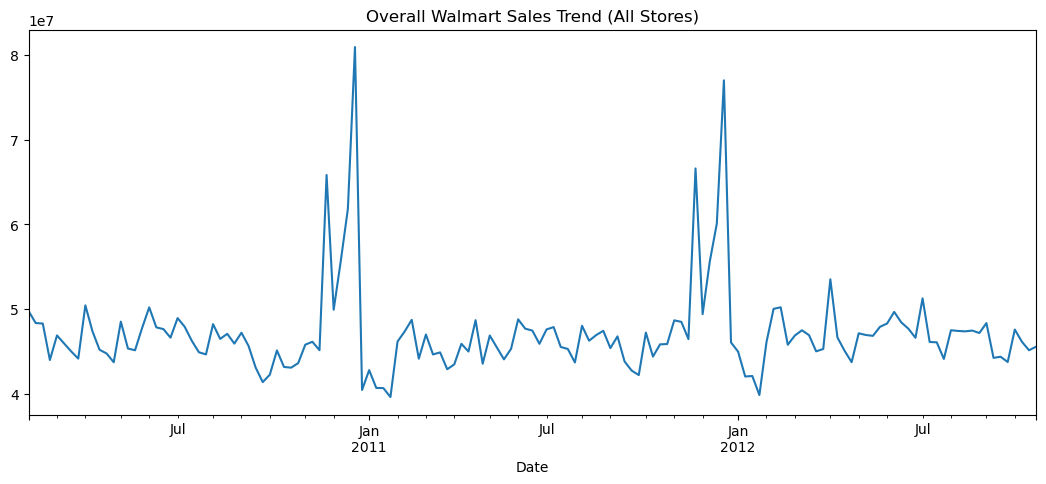

In [15]:
df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(13,5))
plt.title('Overall Walmart Sales Trend (All Stores)')
plt.show()

#### Seasonal sales pattern:
* analysis of the walmart sales data shows a clear seasonal trend , where NOV-DEC emerge as peak sales months.


In [16]:
store_total_sales = (df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False))

### Top 5 Store [Highest Weekly Sale]

In [17]:
top_5_stores = store_total_sales.head()
print(f"Top 5 Store that can Generate a Maximum Weekly sale in {top_5_stores}")

Top 5 Store that can Generate a Maximum Weekly sale in Store
20    301397795
4     299543953
14    288999911
13    286517707
2     275382441
Name: Weekly_Sales, dtype: int64


### Bottom 5 store [Lowest Weekly Sale]

In [18]:
bottom_5_stores = store_total_sales.tail()
print(f"Top 5 Store that can Generate a Minimum Weekly sale in {bottom_5_stores}")

Top 5 Store that can Generate a Minimum Weekly sale in Store
38    55159625
36    53412217
5     45475698
44    43293082
33    37160223
Name: Weekly_Sales, dtype: int64


## Insight's
#### Store performance analysis:
* Among the 45 stores, the top-performing stores in terms of total weekly sales are: store 20,14,13,2 these store consistenly  generates higher weekly sales.
* On the other hand ,the bottom-performing stores are: store 33,44,5,36,38 these stores shows consistently lower weekly sales.

Now we can analyze that from top 5 store that genrates the most sale we can take from them top 3 stores and find out in which Year and which month have the maximum sale 

### top Stores Sales Analysis

In [19]:
top_3_stores= top_5_stores.head(3).index.tolist()
top_3_stores

[20, 4, 14]

Now we create a data frame where only that top 3 store data store

In [20]:
#Creating a dataset
top_df_top3=df[df['Store'].isin(top_3_stores)] 

In [21]:
top_df_top3

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Temperature_C,Year,Month_Name
429,4,2010-02-05,2135144,0,2.6,126.44,8.62,6.666667,2010,February
430,4,2010-02-12,2188307,1,2.6,126.50,8.62,-1.666667,2010,February
431,4,2010-02-19,2049860,0,2.5,126.53,8.62,2.222222,2010,February
432,4,2010-02-26,1925729,0,2.6,126.55,8.62,5.000000,2010,February
433,4,2010-03-05,1971057,0,2.7,126.58,8.62,6.111111,2010,March
...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008351,0,4.0,215.74,7.28,15.000000,2012,September
2856,20,2012-10-05,2246412,0,4.0,215.93,7.29,16.111111,2012,October
2857,20,2012-10-12,2162951,0,4.0,216.12,7.29,8.333333,2012,October
2858,20,2012-10-19,1999363,0,4.0,216.15,7.29,13.333333,2012,October


### Year-wise sales(Top-3 stores)

In [22]:
yearly_sales_top3=(top_df_top3.groupby(['Store','Year',])["Weekly_Sales"].sum().reset_index())

In [23]:
yearly_sales_top3

,Store,Year,Weekly_Sales
0,4,2010,95680471
1,4,2011,111092290
2,4,2012,92771192
3,14,2010,105462242
4,14,2011,106096274
5,14,2012,77441395
6,20,2010,101733080
7,20,2011,109837005
8,20,2012,89827710


In [24]:
max_year_sale= yearly_sales_top3.loc[
yearly_sales_top3.groupby('Store')["Weekly_Sales"].idxmax()]
max_year_sale

,Store,Year,Weekly_Sales
1,4,2011,111092290
4,14,2011,106096274
7,20,2011,109837005


### Insight's:
* We can see that we get insight that the from top 3 stores [store 20 ,store 14 ,store 4 ] the maximum sale that generates in Year 2011 

### Monthly Wise Sales in 2011

In [25]:
df_2011_top3=df[(df['Store'].isin(top_3_stores))&(df['Year']==2011)]

In [26]:
month_sales_2011=(df_2011_top3.groupby('Month_Name')['Weekly_Sales'].sum().sort_values(ascending=False))
month_sales_2011

Month_Name
December     38842423
April        30311610
July         30063909
September    29713092
November     28273450
February     25332318
June         24986162
October      24951963
August       24817443
May          24234234
March        23878914
January      21620051
Name: Weekly_Sales, dtype: int64

In [27]:
peak_month_2011=month_sales_2011.idxmax()
print(f"The highest Weekly_Sales month that genrates the most revenue in 2011: {peak_month_2011}")

The highest Weekly_Sales month that genrates the most revenue in 2011: December


In [28]:
top_key_factors=df_2011_top3[df_2011_top3['Month_Name'] == peak_month_2011]

In [29]:
key_factors_peak_month = top_key_factors[[
    'Holiday_Flag',
    'Temperature_C',
    'Fuel_Price',
    'CPI',
    'Unemployment'
]].mean()
key_factors_peak_month

Holiday_Flag       0.200000
Temperature_C      4.370370
Fuel_Price         3.326667
CPI              176.921333
Unemployment       6.913333
dtype: float64

## Insight's
#### Top store (High Sales Scenerio):
Focus on the top 3 permoring store , the analysis revels that:
* 2011 was the year  the Highest Average weekly sales.
* DECEMBER was the identified as the peak month ,generating the maximum weekly sales.
the avg.key factors during the high-performing period were:
* Holiday_Flag: 0.20
* Temperature (°C): ~4.37
* Fuel Price: ~3.33
* CPI: ~176.92
* Unemployment Rate: ~6%
These values indicates that Holiday presence combined with colder temperature and stable economic conditions significantly contributed to increased consumer spending and higher weekly sales.

In [30]:
df[['Temperature_C']].describe()

,Temperature_C
count,6435.000000
mean,15.931710
std,10.246272
min,-18.888889
25%,8.333333
50%,17.222222
75%,23.888889
max,37.777778


### Diff. Numeric & Categorical Columns

In [31]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI', 'Unemployment', 'Temperature_C', 'Year']

We have 1 categorical features : ['Month_Name']


### Bottom Store Sales Analysis

In [32]:
bottom_3_stores=(df.groupby('Store')["Weekly_Sales"].sum().sort_values().head(3).index.tolist())
bottom_3_stores

[33, 44, 5]

In [33]:
# Creating a dataset 
df_bottom_top3=df[df['Store'].isin(bottom_3_stores)]
df_bottom_top3

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Temperature_C,Year,Month_Name
572,5,2010-02-05,317173,0,2.6,211.65,6.57,4.444444,2010,February
573,5,2010-02-12,311826,1,2.5,211.80,6.57,4.444444,2010,February
574,5,2010-02-19,303448,0,2.5,211.85,6.57,5.000000,2010,February
575,5,2010-02-26,270282,0,2.6,211.88,6.57,8.333333,2010,February
576,5,2010-03-05,288856,0,2.6,211.91,6.57,9.444444,2010,March
...,...,...,...,...,...,...,...,...,...,...
6287,44,2012-09-28,355308,0,3.8,131.04,5.41,18.333333,2012,September
6288,44,2012-10-05,337390,0,3.8,131.08,5.22,16.666667,2012,October
6289,44,2012-10-12,337796,0,3.8,131.11,5.22,12.777778,2012,October
6290,44,2012-10-19,323767,0,3.8,131.15,5.22,11.111111,2012,October


In [34]:
df_bottom_top3['Weekly_Sales'].describe()

count       429.000000
mean     293540.799534
std       38425.951117
min      209986.000000
25%      270498.000000
50%      291809.000000
75%      313358.000000
max      507900.000000
Name: Weekly_Sales, dtype: float64

### Yearly-Month wise Sales(Bottom-3-stores)

In [35]:
avg_yearly_sale_bottom3=(df_bottom_top3.groupby('Year')["Weekly_Sales"].mean().sort_values())
avg_yearly_sale_bottom3

Year
2010    286183.229167
2011    287992.647436
2012    308463.294574
Name: Weekly_Sales, dtype: float64

here we can see that in the in 2012 year we have missing last 2 month data of month (NOV_DEC) so we can try to make the avg.Weeekly sales to predict the best key factors

In [36]:
lowest_year = avg_yearly_sale_bottom3.idxmin()
monthly_sales_lowest_month = (df_bottom_top3[df_bottom_top3['Year'] == lowest_year].groupby('Month_Name')['Weekly_Sales'].mean().sort_values())
lowest_month=monthly_sales_lowest_month.idxmin()

In [37]:
print(f" So Bottom year was {lowest_year} and the month is {lowest_month}.")

 So Bottom year was 2010 and the month is October.


In [38]:
bottom_key_factors=df_bottom_top3[df_bottom_top3['Month_Name'] == lowest_month]

In [39]:
key_factors_bottom_month = bottom_key_factors[[
    'Holiday_Flag',
    'Temperature_C',
    'Fuel_Price',
    'CPI',
    'Unemployment'
]].mean()
key_factors_bottom_month

Holiday_Flag       0.000000
Temperature_C     19.957265
Fuel_Price         3.389744
CPI              158.458718
Unemployment       6.922308
dtype: float64

### Insight's
#### Bottom Store (Low Sales Scenerio):
For the Bottom-Performing stores(Store 33,44 and 5):
* 2010 recorded that lowest avg.weekly sales, making the weakest year.
* OCTOBER was identified as month  with the Lowest sales performance.
The Average key factor  during this low-performing period were:
* Holiday_Flag: 0.00
* Temperature (°C): ~19.96
* Fuel Price: ~3.39
* CPI: ~158.46 (verify value once)
* Unemployment Rate: ~6.92%
The absence of holidays, combined with moderate temperatures and slightly higher unemployment, resulted in reduced customer footfall and lower weekly sales.

Key Comparative Insight
* The contrast between top and bottom stores highlights that:
* Holiday presence is one of the strongest drivers of weekly sales
* Lower temperatures during peak months correlate with higher sales due to festive shopping behavior
* Economic indicators such as unemployment and CPI play a supporting but indirect role

## Visulization

Are top-performing stores consistently strong, or do they rely mainly on holidays?

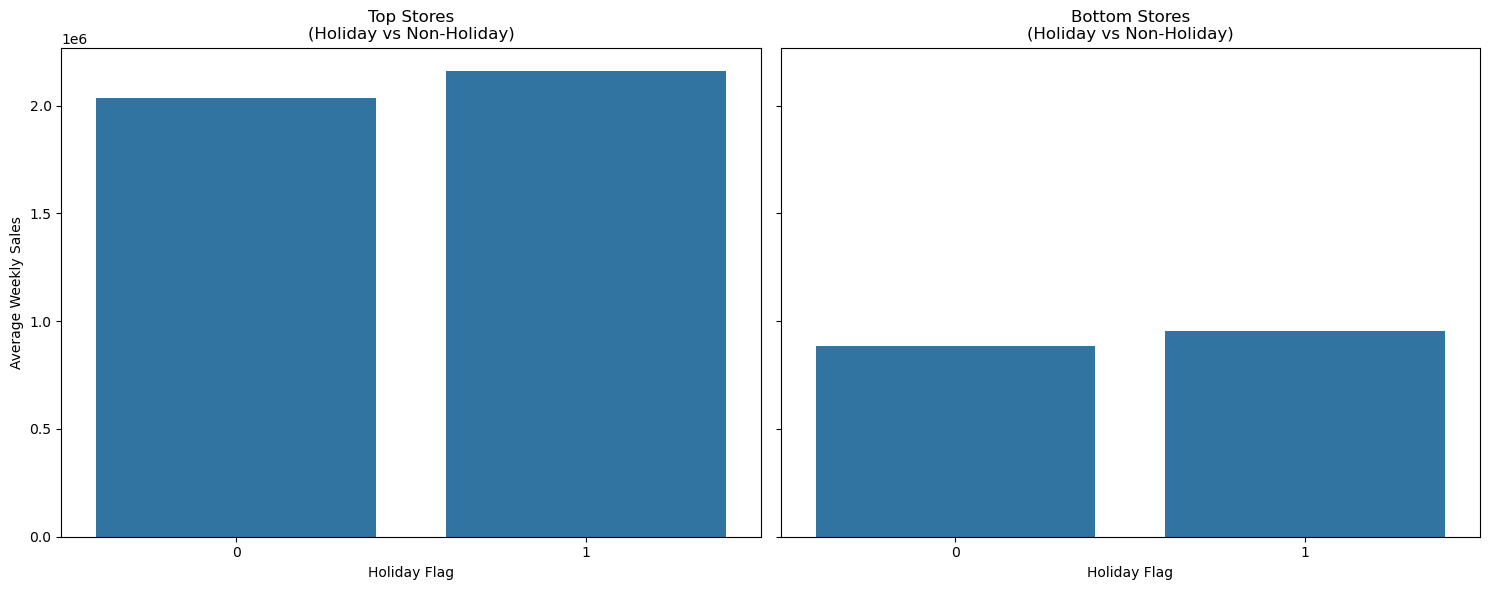

In [40]:
top_stores = [20, 14, 13]
bottom_stores = [33, 4, 5]

top_bar = (
    df[df['Store'].isin(top_stores)]
    .groupby('Holiday_Flag')['Weekly_Sales']
    .mean()
    .reset_index()
)
bottom_bar = (
    df[df['Store'].isin(bottom_stores)]
    .groupby('Holiday_Flag')['Weekly_Sales']
    .mean()
    .reset_index()
)
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.barplot(
    x='Holiday_Flag',
    y='Weekly_Sales',
    data=top_bar,
    ax=axes[0]
)
axes[0].set_title("Top Stores\n(Holiday vs Non-Holiday)")
axes[0].set_xlabel("Holiday Flag")
axes[0].set_ylabel("Average Weekly Sales")
sns.barplot(
    x='Holiday_Flag',
    y='Weekly_Sales',
    data=bottom_bar,
    ax=axes[1]
)
axes[1].set_title("Bottom Stores\n(Holiday vs Non-Holiday)")
axes[1].set_xlabel("Holiday Flag")
axes[1].set_ylabel("")
plt.tight_layout()
plt.show()


### Insights
* Top stores maintain strong weekly sales even during non-holiday periods, with holidays providing an additional boost.
* bottom stores show significantly lower sales in both scenarios, indicating weaker baseline demand and little sensitivity to holiday effects.

In [82]:
df.to_csv("processed_walmart.csv", index=False)